Import the Libraries

In [2]:
import pandas as pd
import numpy as np

Loading and Debuging the Dataset

In [3]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [4]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [5]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [6]:
true["label"]=1

In [7]:
fake["label"]=0

In [8]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [9]:
news=pd.concat([true,fake])

In [10]:
news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

Data Preprocessing

In [11]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Features Selection

In [12]:
news.drop(["title","subject","date"],axis=1,inplace=True)

In [13]:
news.head()

text  label
0  WASHINGTON (Reuters) - The head of a conservat...      1
1  WASHINGTON (Reuters) - Transgender people will...      1
2  WASHINGTON (Reuters) - The special counsel inv...      1
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1

Random Shuffling the dataframe

In [14]:
news = news.sample(frac=1)

In [15]:
news.head()

text  label
15266  BEIJING/SHANGHAI (Reuters) - President Donald ...      1
18775  CAIRO (Reuters) - Islamic State leader Abu Bak...      1
5331   Democratic National Committee Chair Debbie Was...      0
5905   DUBAI (Reuters) - Iran’s foreign ministry summ...      1
7814   Not holding back one bit after her absolute vi...      0

In [16]:
news.reset_index(inplace=True)

In [17]:
news.head()

index                                               text  label
0  15266  BEIJING/SHANGHAI (Reuters) - President Donald ...      1
1  18775  CAIRO (Reuters) - Islamic State leader Abu Bak...      1
2   5331  Democratic National Committee Chair Debbie Was...      0
3   5905  DUBAI (Reuters) - Iran’s foreign ministry summ...      1
4   7814  Not holding back one bit after her absolute vi...      0

In [18]:
news.drop(["index"],axis=1,inplace=True)

In [19]:
news.head()

text  label
0  BEIJING/SHANGHAI (Reuters) - President Donald ...      1
1  CAIRO (Reuters) - Islamic State leader Abu Bak...      1
2  Democratic National Committee Chair Debbie Was...      0
3  DUBAI (Reuters) - Iran’s foreign ministry summ...      1
4  Not holding back one bit after her absolute vi...      0

EDA

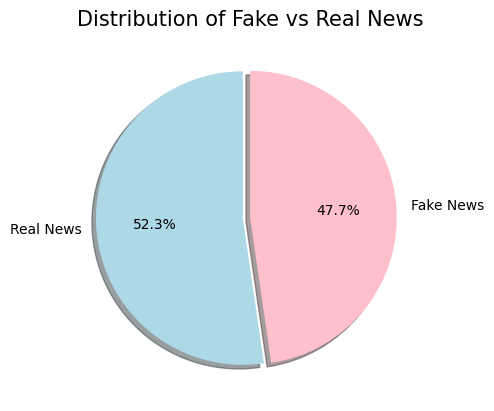

In [20]:
import matplotlib.pyplot as plt

# Get value counts for pie chart
value_counts = news['label'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts,
        labels=['Real News', 'Fake News'],
        colors=['lightblue', 'pink'],  # Green for real, red for fake
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0),  # Slight separation for emphasis
        shadow=True)

plt.title('Distribution of Fake vs Real News',
          fontsize=15)

plt.tight_layout()
plt.show()


In [21]:
value_counts = news['label'].value_counts()
value_counts

label
0    23481
1    21417
Name: count, dtype: int64

**Import Regular Expressions**:A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

In [22]:
import re

In [23]:
import string
import re

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    return text

In [24]:
news['text'] = news['text'].apply(clean_text)

In [25]:
news['text']

0        beijingshanghai reuters president donald trump...
1        cairo reuters islamic state leader abu bakr al...
2        democratic national committee chair debbie was...
3        dubai reuters iran’s foreign ministry summoned...
4        not holding back one bit after her absolute vi...
                               ...                        
44893    reuters since announcing her presidential bid ...
44894    the democrat s war on mostly ugly women former...
44895    washington reuters the head of the us departme...
44896    berlin reuters german chancellor angela merkel...
44897    milan reuters italy s ruling democratic party ...
Name: text, Length: 44898, dtype: object

In [26]:
x = news['text']
y = news['label']

In [27]:
x

0        beijingshanghai reuters president donald trump...
1        cairo reuters islamic state leader abu bakr al...
2        democratic national committee chair debbie was...
3        dubai reuters iran’s foreign ministry summoned...
4        not holding back one bit after her absolute vi...
                               ...                        
44893    reuters since announcing her presidential bid ...
44894    the democrat s war on mostly ugly women former...
44895    washington reuters the head of the us departme...
44896    berlin reuters german chancellor angela merkel...
44897    milan reuters italy s ruling democratic party ...
Name: text, Length: 44898, dtype: object

In [28]:
y

0        1
1        1
2        0
3        1
4        0
        ..
44893    1
44894    0
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
x_train.shape

(31428,)

In [32]:
x_test.shape

(13470,)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()

In [35]:
xv_train = vectorization.fit_transform(x_train)

In [36]:
xv_test = vectorization.transform(x_test)

In [37]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6459229 stored elements and shape (31428, 178585)>

In [38]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2712331 stored elements and shape (13470, 178585)>

Using LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()

In [41]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [42]:
perd_lr=LR.predict(xv_test)

In [43]:
LR.score(xv_test,y_test)

0.9851521900519673

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,perd_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7014
           1       0.98      0.99      0.98      6456

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Using

In [45]:
# from sklearn.tree import DecisionTreeClassifier

In [46]:
# DTC=DecisionTreeClassifier()

In [47]:
# DTC.fit(xv_train,y_train)

In [48]:
# Pred_dtc=DTC.predict(xv_test)

In [49]:
# DTC.score(xv_test,y_test)

In [50]:
# print(classification_report(y_test,Pred_dtc))

In [51]:
# from sklearn.ensemble import RandomForestClassifier

In [52]:
# RFC=RandomForestClassifier()

In [53]:
# RFC.fit(xv_train,y_train)

In [54]:
# pred_rfc=RFC.predict(xv_test)

In [55]:
# RFC.score(xv_test,y_test)

In [56]:
# print(classification_report(y_test,pred_rfc))

In [57]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [58]:
# !pip install -q streamlit

In [59]:
import joblib
joblib.dump(vectorization, "vectorizer.jb")
joblib.dump(LR, "lr_model.jb")

['lr_model.jb']

In [60]:
%%writefile app.py
import streamlit as st
import joblib

vectorizer = joblib.load('vectorizer.jb')
model = joblib.load('lr_model.jb')

st.title("Fake News Detector")
st.write("Enter a News Article below to check whether it is Fake or Real.")
news_input = st.text_area("News Article:")

if st.button('Check News'):
    if news_input.strip():
        transform_input = vectorizer.transform([news_input])
        prediction = model.predict(transform_input)

        if prediction[0] == 1:
            st.success("The News is Real!")
        else:
            st.error("The News is Fake!")
    else:
        st.warning("Please enter some text to analyze.")


Writing app.py


In [61]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [62]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

⠙⠹⠸your url is: https://whole-islands-nail.loca.lt
